# imports and constants

In [76]:
import pandas as pd

from os.path import join as join_pth
import matplotlib.pyplot as plt
import random
from IPython.core.display_functions import display
import seaborn as sns
# % matplotlib inline
sns.set_style('whitegrid')
import torch
import numpy as np
from src import *
from src import data_loader,models,model_training
from torch.utils.data.dataloader import  DataLoader
from sklearn.model_selection import train_test_split

In [77]:
from importlib import reload,import_module

reload(data_loader)
reload(data_preprocessing)
reload(models)
reload(model_training)

<module 'src.model_training' from 'D:\\2022 acheivments\\Projects\\DeepLearning NanoDegree\\Rossmann-Store-Sales\\src\\model_training.py'>

In [69]:
raw_dataset_path = "../dataset/raw"
prep_dataset_path="../dataset/prep"
nn_model_weights_pth="../model_weights/nn_model"
nn_model_train_data_pth="../train_data/nn_model"

# roadmap
- data preparation after analysis run bulk preprocessing functions that have all preprocessing and feature engineering done at the analysis section
- start with the neural network without lstm layers and get the best score after hyperparameters tuning
    - create data loader for the neural network
    - find the best hyperparameters for the first epochs
    - train the model on the best hyperparameters

# Data preparation
- after analysing , handling outliers the data and do feature engineering on the data columns in the [rossmann-store-sales-analysis](./Rossmann-Store-Sales.ipynb) notebook column by column
- all steps are combined in the [data_preprocessing.py](../src/data_preprocessing.py) module for bulk preprocessing
    - store data preprocessing and feature engineering
    - store_sales preprocessing and feature engineering
    - merging store data and store sales and add new columns



In [78]:
stores_df = pd.read_csv(join_pth(raw_dataset_path, "store.csv"), low_memory=False)
stores_sales_df = pd.read_csv(join_pth(raw_dataset_path, "train.csv"), low_memory=False)

# Sales bulk preprocessing
stores_sales_df_prep=data_preprocessing.store_sales_prep(stores_sales_df=stores_sales_df)

# Store data bulk preprocessing
stores_data_df_prep=data_preprocessing.store_data_prep(store_data_df=stores_df)

# merge and do bulk preprocessing
merge_prep=data_preprocessing.merge_store_sales(sales_data_df=stores_sales_df_prep,store_data_df=stores_data_df_prep)

# drop closed stores data and open column
merge_prep=data_preprocessing.drop_closed_days(merge_prep)
merge_prep=data_preprocessing.drop_extra_cols(merge_prep)



In [73]:
merge_prep.StateHoliday.value_counts()

0    843482
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

In [75]:
stores_sales_df[stores_sales_df.Open==1].StateHoliday.value_counts()

0    843482
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

In [60]:
merge_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017207
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Store                 844392 non-null  int64   
 1   DayOfWeek             844392 non-null  category
 2   Sales                 844392 non-null  int64   
 3   Promo                 844392 non-null  category
 4   StateHoliday          910 non-null     object  
 5   SchoolHoliday         844392 non-null  category
 6   month                 844392 non-null  int64   
 7   day                   844392 non-null  int64   
 8   StoreType             844392 non-null  category
 9   Assortment            844392 non-null  category
 10  CompetitionDistance   844392 non-null  float64 
 11  Promo2                844392 non-null  category
 12  Promo2Since           844392 non-null  float64 
 13  CompetitionOpenSince  844392 non-null  float64 
 14  isPromoMonth          844392 non-nu

In [40]:
# hot-encode the categorical data
encoded_data=data_preprocessing.hot_encoding(merged_data=merge_prep)

In [41]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017207
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Store                   844392 non-null  float64
 1   Sales                   844392 non-null  float64
 2   Promo                   844392 non-null  float64
 3   SchoolHoliday           844392 non-null  float64
 4   month                   844392 non-null  float64
 5   day                     844392 non-null  float64
 6   CompetitionDistance     844392 non-null  float64
 7   Promo2                  844392 non-null  float64
 8   Promo2Since             844392 non-null  float64
 9   CompetitionOpenSince    844392 non-null  float64
 10  isPromoMonth            844392 non-null  float64
 11  DayOfWeek_1             844392 non-null  float64
 12  DayOfWeek_2             844392 non-null  float64
 13  DayOfWeek_3             844392 non-null  float64
 14  DayOfWeek_4        

In [42]:
train_data,test_data=train_test_split(encoded_data,test_size=0.2)



In [43]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 675513 entries, 92895 to 1003811
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Store                   675513 non-null  float64
 1   Sales                   675513 non-null  float64
 2   Promo                   675513 non-null  float64
 3   SchoolHoliday           675513 non-null  float64
 4   month                   675513 non-null  float64
 5   day                     675513 non-null  float64
 6   CompetitionDistance     675513 non-null  float64
 7   Promo2                  675513 non-null  float64
 8   Promo2Since             675513 non-null  float64
 9   CompetitionOpenSince    675513 non-null  float64
 10  isPromoMonth            675513 non-null  float64
 11  DayOfWeek_1             675513 non-null  float64
 12  DayOfWeek_2             675513 non-null  float64
 13  DayOfWeek_3             675513 non-null  float64
 14  DayOfWeek_4    

<p style="font-size:18;font-weight:bold">Save preprocessed data</p>

In [44]:
file_name="merged_sales_train.csv"
train_data.to_csv(join_pth(prep_dataset_path,file_name),index=False)

file_name="merged_sales_test.csv"
test_data.to_csv(join_pth(prep_dataset_path,file_name),index=False)

# Data Loader
- load preprocessed data csv
- create neural network model data loader

In [4]:
file_name="merged_sales_train.csv"
sales_train_dataset=pd.read_csv(join_pth(prep_dataset_path,file_name))

file_name="merged_sales_test.csv"
sales_test_dataset=pd.read_csv(join_pth(prep_dataset_path,file_name))
sales_train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675513 entries, 0 to 675512
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Store                   675513 non-null  float64
 1   Sales                   675513 non-null  float64
 2   Promo                   675513 non-null  float64
 3   SchoolHoliday           675513 non-null  float64
 4   month                   675513 non-null  float64
 5   day                     675513 non-null  float64
 6   CompetitionDistance     675513 non-null  float64
 7   Promo2                  675513 non-null  float64
 8   Promo2Since             675513 non-null  float64
 9   CompetitionOpenSince    675513 non-null  float64
 10  isPromoMonth            675513 non-null  float64
 11  DayOfWeek_1             675513 non-null  float64
 12  DayOfWeek_2             675513 non-null  float64
 13  DayOfWeek_3             675513 non-null  float64
 14  DayOfWeek_4         

In [5]:
nn_sales_train_dataset=data_loader.NNSalesDataset(sales_train_dataset)
nn_sales_test_dataset=data_loader.NNSalesDataset(sales_test_dataset)

In [6]:
# dataset testing
dataset_iter=iter(nn_sales_train_dataset)
x,y=next(dataset_iter)
print(x)
print(x.shape)
print(y)

tensor([0.0000, 1.0000, 9.0000, 2.0000, 0.1500, 1.0000, 0.0000, 0.0000, 0.0000,
        1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000])
torch.Size([26])
tensor([7177.])


In [7]:
display(merge_prep.iloc[0])
display(encoded_data.iloc[0])
display(x)
display(y)


NameError: name 'merge_prep' is not defined

In [8]:
batch_size=64
nn_sales_train_dataloader=DataLoader(nn_sales_train_dataset,batch_size=batch_size,shuffle=True)
nn_sales_test_dataloader=DataLoader(nn_sales_test_dataset,batch_size=batch_size,shuffle=True,)

In [9]:
# Data loader testing
dataloader_iter=iter(nn_sales_train_dataloader)
x,y=next(dataloader_iter)
print(x.shape)
print(y.shape)

torch.Size([64, 26])
torch.Size([64, 1])


# model trainning

## select best model architecture

In [ ]:
hidden_shapes=[[512,128,32,1],[256,128,1],[512,256,64,1],[128,64,32,1],[128,32,1],[512,256,128,32,1],[256,64,1],[512,64,1],[256,32,1],[512,32,1],[128,64,1],[128,32,1],[512,128,1]]
input_size=nn_sales_train_dataloader.dataset.no_cols
output_size=1
dropout_prop=0.5

for hidden_shape in hidden_shapes:
  nn_model=models.SalesNN(input_size,hidden_shape,output_size,dropout_prop)
  train_losses,valid_losses=model_training.nn_model_train(nn_model,nn_sales_train_dataloader,nn_sales_test_dataloader,20,last_weights=True,train_data_dir=nn_model_train_data_pth,weights_dir=nn_model_weights_pth)

In [10]:
train_history=pd.read_csv(join_pth(nn_model_train_data_pth,"train_data.csv"))
train_epochs=pd.read_csv(join_pth(nn_model_train_data_pth,"epochs_data.csv"))

In [11]:
train_history.head()

,epoch idx from,model architecture,batch_size,optimizer,model_layers,changed hyperParameters
0,1,"SalesNN(\n (dropout): Dropout(p=0.5, inplace=...",64,Adam (\nParameter Group 0\n amsgrad: False\...,"[512,128,32,1]","['model architecture', 'batch_size', 'optimizer']"
1,31,"SalesNN(\n (dropout): Dropout(p=0.5, inplace=...",64,Adam (\nParameter Group 0\n amsgrad: False\...,"[256,128,1]",['model architecture']
2,61,"SalesNN(\n (dropout): Dropout(p=0.5, inplace=...",64,Adam (\nParameter Group 0\n amsgrad: False\...,"[512,256,64,1]",['model architecture']
3,91,"SalesNN(\n (dropout): Dropout(p=0.5, inplace=...",64,Adam (\nParameter Group 0\n amsgrad: False\...,"[128,64,32,1]",['model architecture']
4,121,"SalesNN(\n (dropout): Dropout(p=0.5, inplace=...",64,Adam (\nParameter Group 0\n amsgrad: False\...,"[128,32,1]",['model architecture']


In [14]:
train_history=train_history[["epoch idx from",'model_layers']]
train_history

,epoch idx from,model_layers
0,1,"[512,128,32,1]"
1,31,"[256,128,1]"
2,61,"[512,256,64,1]"
3,91,"[128,64,32,1]"
4,121,"[128,32,1]"
5,123,"[512,256,128,32,1]"
6,146,"[256,64,1]"
7,176,"[512,64,1]"
8,196,"[256,32,1]"
9,216,"512,32,1]"


<p style="font-size:25;font-weight:bold">Note</p>

- this is all the architectures tested
- the goal is to select the best architecture to continue with

In [15]:
train_epochs.head()

,Train Loss,no train rows,Test Loss,No test rows,Time taken (M),Date,Time
0,1.130611e+07,675520,7.383474e+06,168896,2.79,10/01/2023,00:20:00
1,1.096914e+07,675520,7.318650e+06,168896,3.07,10/01/2023,00:22:00
2,1.066253e+07,675520,6.660805e+06,168896,3.11,10/01/2023,00:23:00
3,1.030855e+07,675520,6.831622e+06,168896,3.10,10/01/2023,00:25:00
4,9.919447e+06,675520,7.173720e+06,168896,3.12,10/01/2023,00:27:00


<p style="font-size:25;font-weight:bold">Plot all archritectures train curve</p>

- select the best architecture

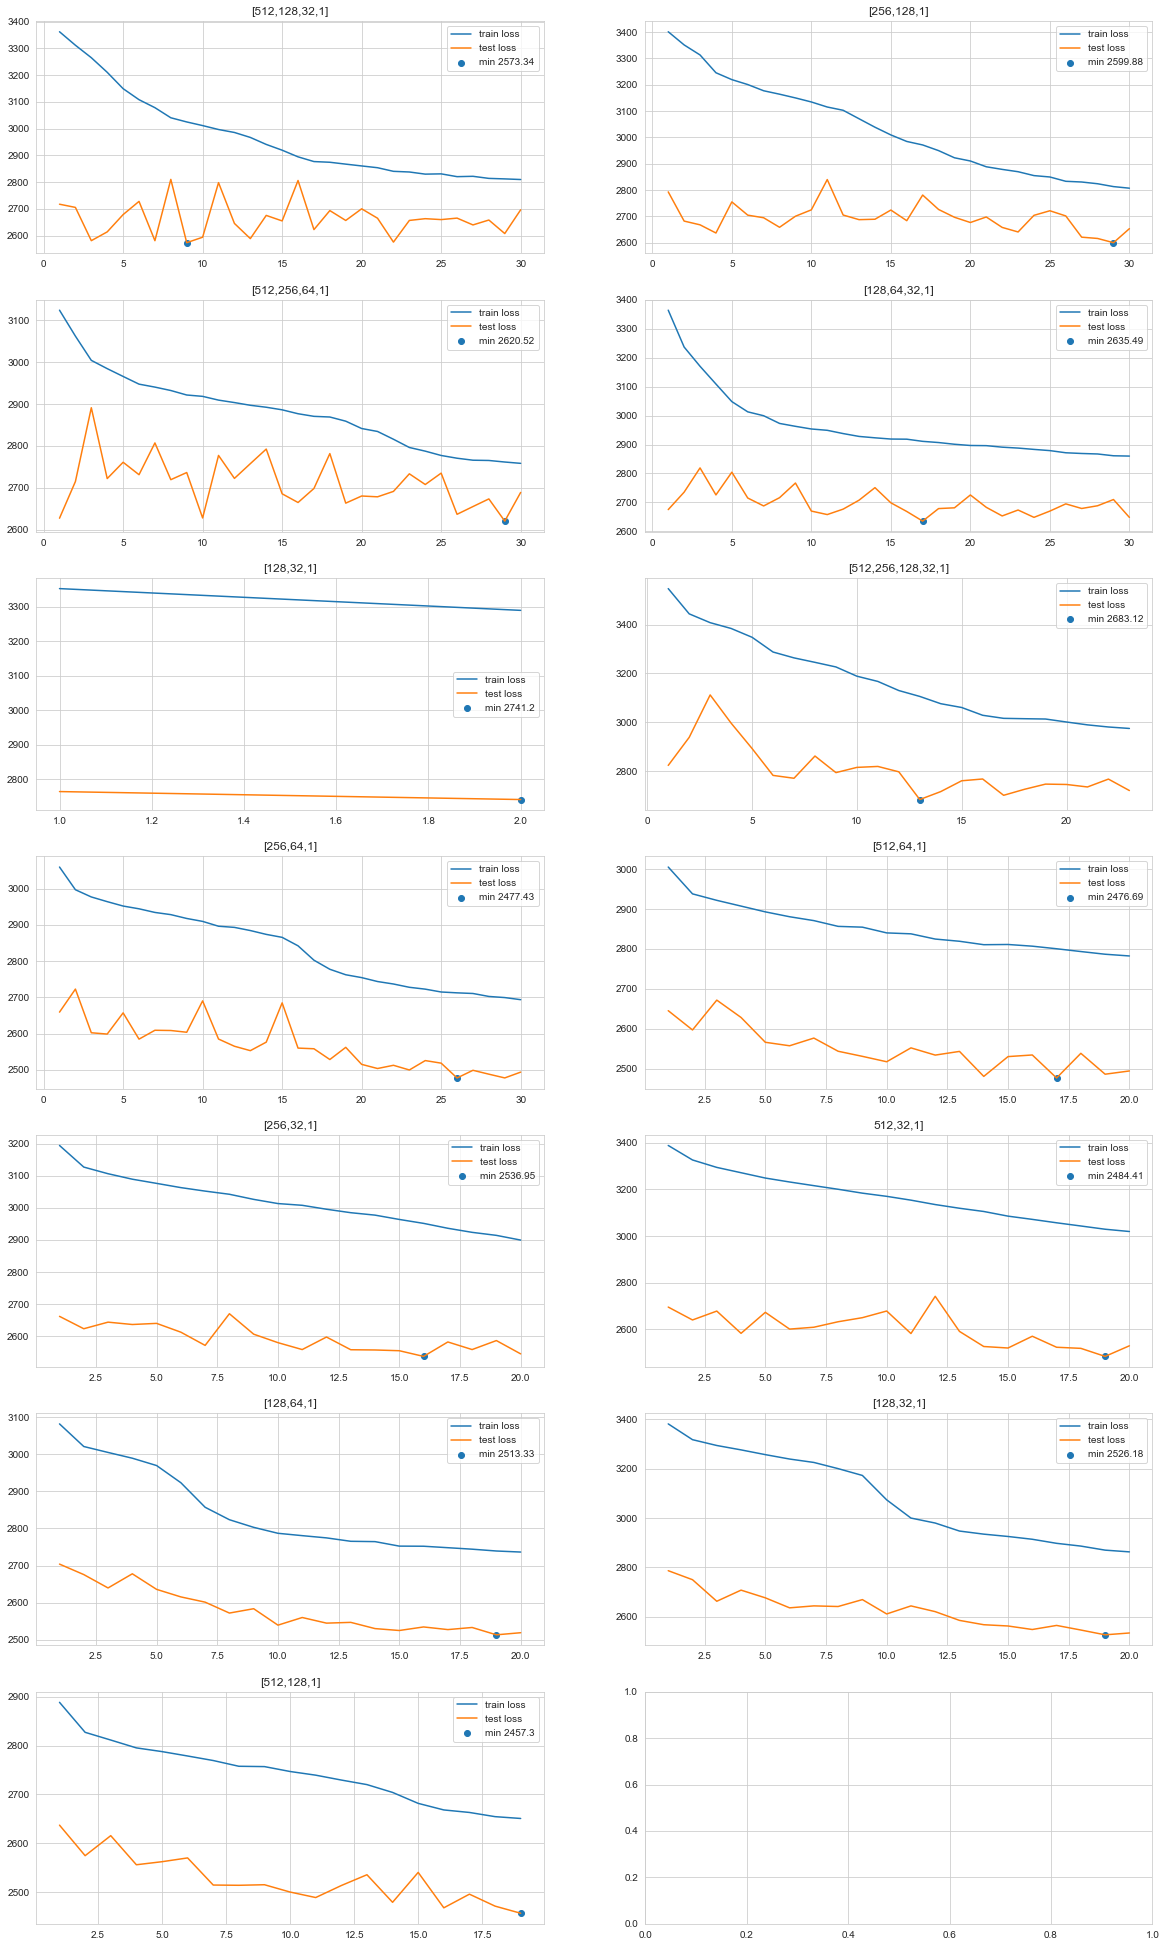

In [39]:
import math
n_rows=math.ceil(len(train_history)/2.0)
n_cols=2
fig,ax=plt.subplots(n_rows,n_cols,figsize=(20,35))
for i in range(len(train_history)):
  start_idx=train_history.iloc[i]['epoch idx from']-1

  if i==len(train_history)-1:
    end_idx=-1
  else:
    end_idx=train_history.iloc[i+1]['epoch idx from']-1

  train_losses=np.sqrt(train_epochs.iloc[start_idx:end_idx]['Train Loss'].to_numpy())
  test_losses=np.sqrt(train_epochs.iloc[start_idx:end_idx]['Test Loss'].to_numpy())

  architecture=train_history.iloc[i]['model_layers']

  ax_row=(i//2)
  ax_col=i%2

  ax[ax_row][ax_col].plot(range(1, 1 + len(train_losses)),train_losses, label="train loss")
  ax[ax_row][ax_col].plot(range(1, 1 + len(test_losses)),test_losses, label="test loss")
  #
  min_test_x=test_losses.argmin()+1
  min_test_y=test_losses.min()
  ax[ax_row][ax_col].scatter(min_test_x,min_test_y,label=f"min {round(min_test_y,2)}")

  ax[ax_row][ax_col].set_title(architecture)
  ax[ax_row][ax_col].legend()


<p style="font-size:25;font-weight:bold">Note</p>

- best architectures consist of 3 layers and the best of them are the 512,128,1 with min root mean squared error value `2457.3`

## best architecture training

In [ ]:
hidden_shape=[512,128,1]
input_size=nn_sales_train_dataloader.dataset.no_cols
output_size=1
dropout_prop=0.5

nn_model=models.SalesNN(input_size,hidden_shape,output_size,dropout_prop)
train_losses,valid_losses=model_training.nn_model_train(nn_model,nn_sales_train_dataloader,nn_sales_test_dataloader,20,last_weights=True,train_data_dir=nn_model_train_data_pth,weights_dir=nn_model_weights_pth)

In [ ]:
merge_prep